<a href="https://colab.research.google.com/github/ABHAY1937/-ML/blob/main/air_quality_india.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("/content/air-quality-india.csv")
df

,Timestamp,Year,Month,Day,Hour,PM2.5
0,2017-11-07 12:00:00,2017,11,7,12,64.51
1,2017-11-07 13:00:00,2017,11,7,13,69.95
2,2017-11-07 14:00:00,2017,11,7,14,92.79
3,2017-11-07 15:00:00,2017,11,7,15,109.66
4,2017-11-07 16:00:00,2017,11,7,16,116.50
...,...,...,...,...,...,...
36187,2022-06-04 11:00:00,2022,6,4,11,35.89
36188,2022-06-04 12:00:00,2022,6,4,12,33.83
36189,2022-06-04 13:00:00,2022,6,4,13,33.05
36190,2022-06-04 14:00:00,2022,6,4,14,35.29


In [3]:
df.isna().sum()

Timestamp    0
Year         0
Month        0
Day          0
Hour         0
PM2.5        0
dtype: int64

In [4]:
df.dtypes

Timestamp     object
Year           int64
Month          int64
Day            int64
Hour           int64
PM2.5        float64
dtype: object

In [5]:
df.drop(columns=["Timestamp"],axis=1,inplace=True)

In [6]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [8]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
scalar.fit(x_train)
x_train=scalar.fit_transform(x_train)
x_test=scalar.fit_transform(x_test)

In [9]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(max_depth=2)
model.fit(x_train,y_train)


RandomForestRegressor(max_depth=2)

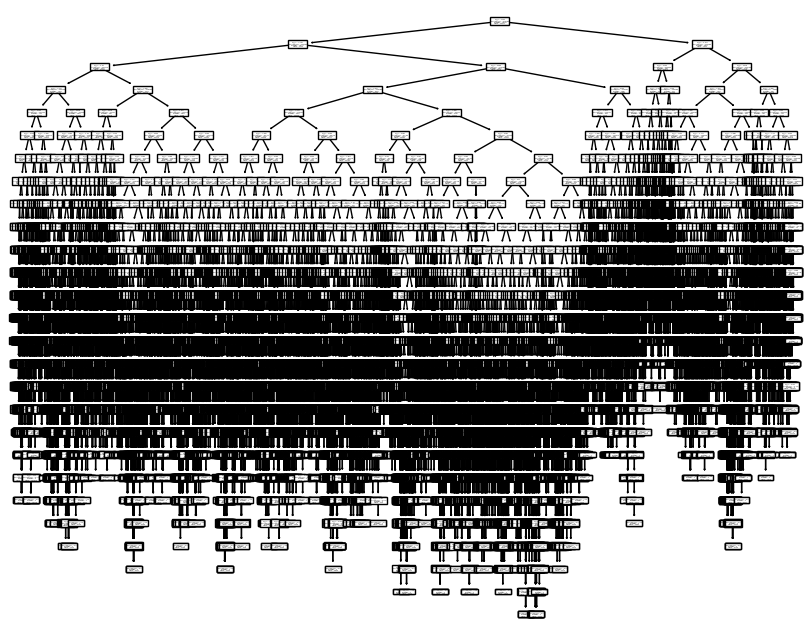

In [10]:
from sklearn.tree import plot_tree
# Create a random forest classifier
clf = RandomForestRegressor(n_estimators=10)
# Train the classifier on the dataset
clf.fit(x_train, y_train)

# Create a figure with a desired size
fig, ax = plt.subplots(figsize=(10, 8))

# Plot a single decision tree from the random forest
plot_tree(clf.estimators_[0], ax=ax)

# Show the plot
plt.show()

In [11]:
y_pred=model.predict(x_test)
y_pred

array([72.14021202, 32.81762861, 63.08471875, ..., 72.14021202,
       32.81762861, 32.81762861])

In [12]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
score

0.5413608645459189

In [13]:
from sklearn.metrics import mean_absolute_error
mse=mean_absolute_error(y_test,y_pred)
mse

12.775252602011605

In [14]:
pd.DataFrame(data={"observed_value":y_test,"predicted_value":y_pred,"error":y_test - y_pred})

,observed_value,predicted_value,error
23802,77.44,72.140212,5.299788
14854,38.70,32.817629,5.882371
1278,96.36,63.084719,33.275281
12837,13.99,32.817629,-18.827629
33196,40.54,63.084719,-22.544719
...,...,...,...
8237,104.88,72.329001,32.550999
7539,56.85,72.329001,-15.479001
16134,73.98,72.140212,1.839788
28474,23.57,32.817629,-9.247629
